In [4]:
import pandas as pd
data = pd.read_csv("Impact_of_Mobile_Phone_on_Students_Healthhhhh.csv")
data

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Agree,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Neutral,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Strongly agree,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,Strongly agree,During Class Lectures,No,Internet Access,Only Partially,Reasarch,NaN,Never,Limiting Screen Time,Excellent
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,Agree,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Zahoor,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,> 6 hours,Agree,During Exams,Yes,Internet Access,Yes,Reasarch,Headache,Sometimes,Taking Break during prolonged use,Excellent
96,Hafeez,16-20,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Strongly agree,During Class Lectures,No,Notes Taking App,No,Reasarch,Anxiety or Stress,Sometimes,Taking Break during prolonged use,Good
97,Babar,16-20,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,2-4 hours,Agree,While Studying,No,Internet Access,No,Reasarch,Headache,Never,Limiting Screen Time,Excellent
98,Rizwan,16-20,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Agree,During Exams,No,Internet Access,Yes,Reasarch,Headache,Rarely,Limiting Screen Time,Excellent;Good


In [6]:
print("Loaded Dataset:")
print(data.head())

Loaded Dataset:
      Names    Age Gender  Mobile Phone  Mobile Operating System   \
0       Ali  21-25    Male           Yes                  Android   
1     Bilal  21-25    Male           Yes                  Android   
2    Hammad  21-25    Male           Yes                      IOS   
3  Abdullah  21-25    Male           Yes                  Android   
4     Waqar  21-25    Male           Yes                      IOS   

  Mobile phone use for education Mobile phone activities Helpful for studying  \
0                      Sometimes            Social Media                  Yes   
1                      Sometimes            Social Media                  Yes   
2                      Sometimes            All of these                  Yes   
3                     Frequently            All of these                  Yes   
4                     Frequently            All of these                  Yes   

     Educational Apps Daily usages Performance impact      Usage distraction  \
0 

count    100.000000
mean      21.210000
std        1.913773
min       18.000000
25%       19.750000
50%       21.000000
75%       23.000000
max       24.000000
Name: Age, dtype: float64


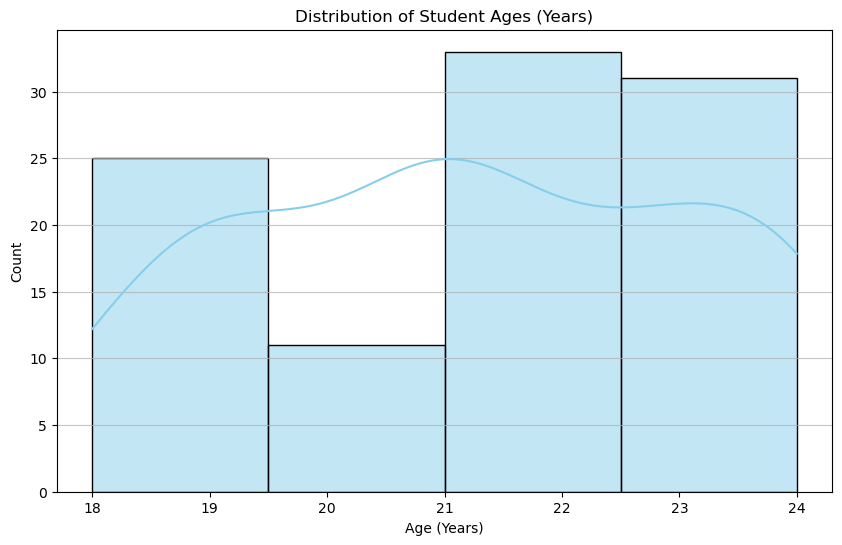

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data (replace with your actual DataFrame)
np.random.seed(42)  # for reproducibility
data = {'Age': np.random.randint(18, 25, 100)} #Example data, replace with your df['Age']
df = pd.DataFrame(data)

# Data exploration
print(df['Age'].describe())

# Freedman-Diaconis rule for bin width
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
binwidth = 2 * iqr * len(df['Age'])**(-1/3)
nbins = int((df['Age'].max() - df['Age'].min()) / binwidth)

# Plotting
plt.figure(figsize=(10, 6))  # Slightly larger figure
sns.histplot(data=df, x='Age', bins=nbins, kde=True, color='skyblue') #use nbins instead of 10
plt.title('Distribution of Student Ages (Years)')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75) # Add gridlines
plt.show()

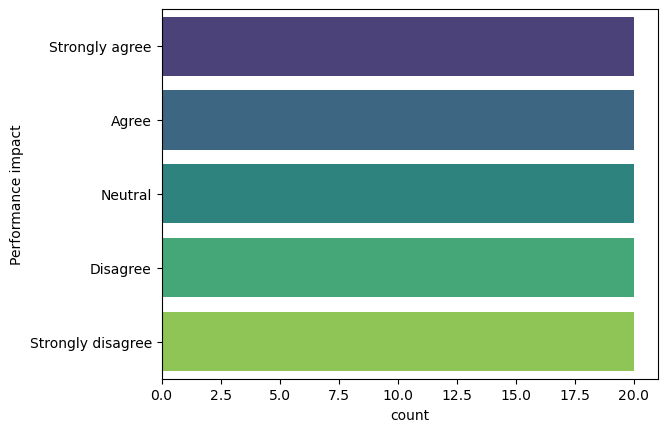

Performance impact
Strongly agree       20.0
Agree                20.0
Neutral              20.0
Disagree             20.0
Strongly disagree    20.0
Name: proportion, dtype: float64


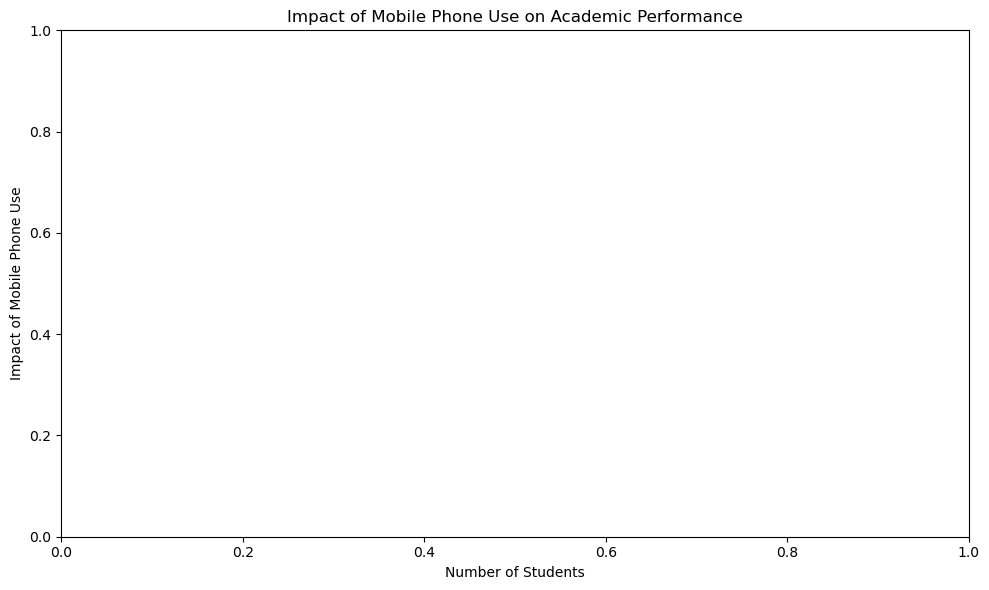

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Sample data (replace with your actual DataFrame)
df = pd.DataFrame({'Performance impact': ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree'] * 20})
order = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
ax = sns.countplot(y='Performance impact', data=df, order=order, palette='viridis', hue='Performance impact', legend=False)
plt.show()

# Data Exploration (optional but recommended)
print(df['Performance impact'].value_counts(normalize=True) * 100)

# Order bars by count
order = df['Performance impact'].value_counts().index

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Impact of Mobile Phone Use on Academic Performance')
plt.ylabel('Impact of Mobile Phone Use')
plt.xlabel('Number of Students')

# Add percentage labels (optional)
total = len(df['Performance impact'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total) #Corrected: get_width() for horizontal bars
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center')

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [11]:
data = pd.read_csv('Impact_of_Mobile_Phone_on_Students_Healthhhhh.csv')
data['Age'] = data['Age'].astype(str).str.replace('-', '', regex=False)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [16]:
data =pd.read_csv('Impact_of_Mobile_Phone_on_Students_Healthhhhh.csv')

In [18]:
data.head()

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Agree,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Neutral,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Strongly agree,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,Strongly agree,During Class Lectures,No,Internet Access,Only Partially,Reasarch,NaN,Never,Limiting Screen Time,Excellent
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,Agree,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent


In [1]:
# import library for splitting data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
model = RandomForestClassifier()

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [7]:
# separate the dependent and the independent variable
data = pd.read_csv('Impact_of_Mobile_Phone_on_Students_Healthhhhh.csv')
X = data.drop('Names',axis=1)
y = data['Names']

In [9]:
X, y = make_classification(n_samples=100, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestClassifier (random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [146]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0]


In [148]:
accuracy= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [150]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9
Precision: 0.9222222222222222
Recall: 0.9
F1 Score: 0.9020833333333332


In [215]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

In [217]:
y_pred = model.predict(X_test)

In [221]:
accuracy, accuracy_score(y_test, y_pred)
print(accuracy)

0.9


In [223]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [225]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):",mae)

Mean Squared Error (MSE): 0.1
Mean Absolute Error (MAE): 0.1


In [227]:
print(X_train.shape, X_train.shape)
print(X_test.shape, X_test.shape)
print(y_train.shape, y_train.shape)
print(y_test.shape, y_train.shape)

(80, 20) (80, 20)
(20, 20) (20, 20)
(80,) (80,)
(20,) (80,)


model= RandomForestRegressor(n_estimators=100, random_state=0

In [234]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.78      1.00      0.88         7

    accuracy                           0.90        20
   macro avg       0.89      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



In [264]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [266]:
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=42)

In [268]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [270]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
lables = dbscan.fit_predict(X_scaled)

In [272]:
print(lables)

[0 1 2 1 0 1 3 3 3 2 2 1 1 3 2 0 0 3 0 0 2 0 0 3 3 2 3 0 0 1 1 3 1 0 2 2 2
 2 3 3 0 3 1 2 2 1 1 0 0 3 3 3 3 1 0 0 2 2 3 2 1 3 0 1 0 0 1 0 3 1 3 1 0 2
 1 0 1 0 1 1 3 1 2 0 2 2 2 1 2 3 3 1 2 1 2 2 2 3 0 3]


In [282]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
df = pd.read_csv('Impact_of_Mobile_Phone_on_Students_Healthhhhh.csv')

In [296]:
X = df.drop(columns=['Age'], errors=' ignore')

In [408]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [410]:
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

In [412]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [414]:
print(X_pca)

[[-0.39960834 -1.20977853]
 [-1.6010322   0.8010791 ]
 [ 0.83306793 -0.64669733]
 [-1.56434783  0.86124732]
 [-0.15808005 -1.25332391]
 [-1.70365098  0.60718669]
 [ 1.10190686  1.17442188]
 [ 1.01416274  1.1716152 ]
 [ 1.08218782  1.15565053]
 [ 0.76560258 -0.69124532]
 [ 0.79727081 -0.62321202]
 [-1.47490503  0.57862854]
 [-1.52007389  0.67219791]
 [ 0.83462869  1.20541881]
 [ 0.90684519 -0.52193945]
 [-0.28086556 -1.3653538 ]
 [-0.14645048 -1.27828236]
 [ 1.07068814  1.13935924]
 [-0.28807077 -1.32740783]
 [-0.19210365 -1.20032509]
 [ 0.76432485 -0.57695877]
 [-0.20890137 -1.27398022]
 [-0.20387664 -1.33972108]
 [ 1.14301025  1.13827096]
 [ 1.11219406  1.10380047]
 [ 0.86912981 -0.681307  ]
 [ 0.86249138  1.12676351]
 [-0.23343817 -1.13393748]
 [-0.25204085 -1.37836546]
 [-1.77569036  0.63872582]
 [-1.62329564  0.57786651]
 [ 1.0499537   1.22059897]
 [-1.57846134  0.6131838 ]
 [-0.18713776 -1.0926467 ]
 [ 1.01686981 -0.49378043]
 [ 0.76499946 -0.6001868 ]
 [ 0.74210026 -0.46746881]
 

In [416]:
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

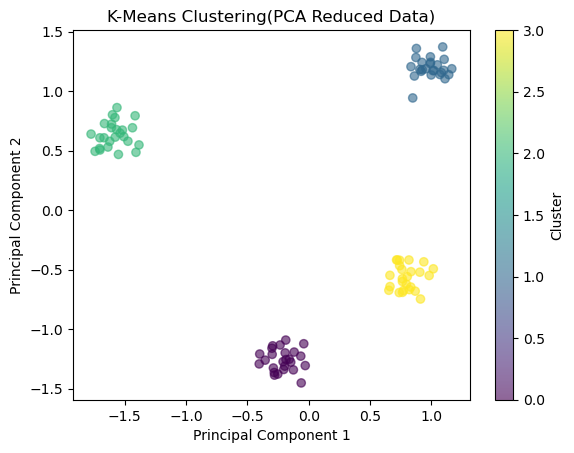

In [418]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha= 0.6)
plt.title("K-Means Clustering(PCA Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [419]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [422]:
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=0.6, random_state=0)

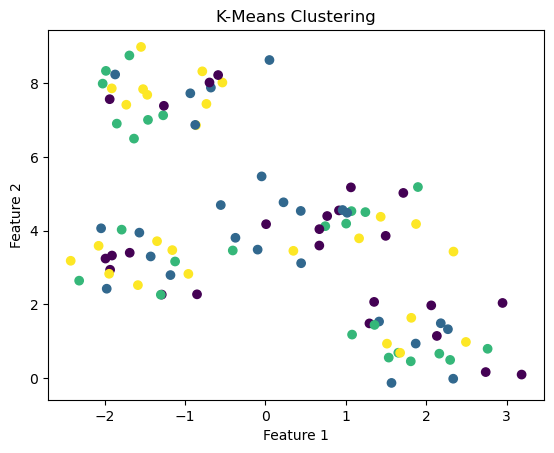

In [424]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()